<a href="https://colab.research.google.com/github/RavitejaGundimeda/MachineLearning/blob/main/dimReductionPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step By Step Implementation of PCA

In [22]:
'''
References: 
1. AppliedAI(https://www.appliedaicourse.com/)
2. dataset - https://www.kaggle.com/c/digit-recognizer/data
3. https://colah.github.io/posts/2014-10-Visualizing-MNIST/
'''

#loading the MNIST data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv file into a data frame
df = pd.read_csv('train.csv')

#print(d0.head(5))

#saving the label column into variable 'lbl'
lbl = df['label']

print(lbl.shape)

#drop the label feature and store the pixel data into variable 'd'
d = df.drop("label",axis=1)

#print(d)

(42000,)


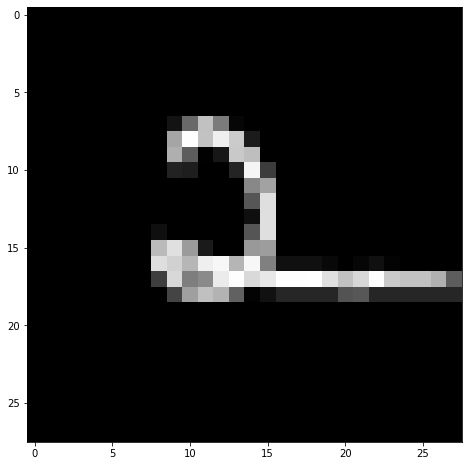

Corresponding label is  2


In [2]:
#plotting a number

plt.figure(figsize=(8,8))

ind = 55 #index 

gridData = d.iloc[ind].to_numpy().reshape(28,28) #reshaping the pixel data into 2D from 1D
plt.imshow(gridData, interpolation = None, cmap = "gray") #show image
plt.show()

print('Corresponding label is ',lbl[ind])

In [3]:
labels = lbl.head(15000)
data = d.head(15000)
print(data.shape)

(15000, 784)


In [4]:
#Standardization
from sklearn.preprocessing import StandardScaler
standardizedData = StandardScaler().fit_transform(data)
print(standardizedData.shape)

(15000, 784)


In [5]:
#Finding Covariance Matrix
sampleData = standardizedData
covarMatrix = np.matmul(sampleData.T,sampleData)
print(covarMatrix.shape)

(784, 784)


In [8]:
#computing eigen values and vectors from the covariance matrix
from scipy.linalg import eigh
#eigh() computes the eigen values, vectors and sorts them in ascending order, highest eigen values are picked.
values,vectors = eigh(covarMatrix,eigvals=(782,783))
vectors = vectors.T
print(vectors.shape)

(2, 784)


In [11]:
#multiplying the eigen vectors(2,784) with sample data(15000,784)
newCoordinates = np.matmul(vectors,sampleData.T)
print(newCoordinates.shape)
#appending labels to new co ordinates 
newCoordinates = np.vstack((newCoordinates,labels)).T
#creating data frame, such that we can plot newCoordinates
dataFrame = pd.DataFrame(data=newCoordinates,columns=("1stPrincipal", "2ndPrincipal", "label"))
print(dataFrame.head())

(2, 15000)
   1stPrincipal  2ndPrincipal  label
0     -5.558661     -5.043558    1.0
1      6.193635     19.305278    0.0
2     -1.909878     -7.678775    1.0
3      5.525748     -0.464845    4.0
4      6.366527     26.644289    0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


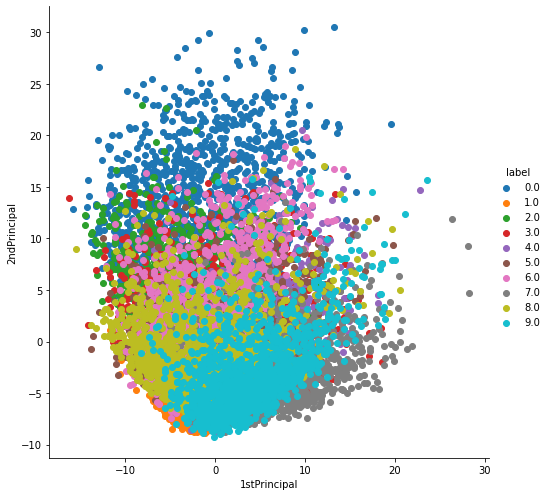

In [14]:
import seaborn as sns
sns.FacetGrid(dataFrame,hue="label",size=7).map(plt.scatter, "1stPrincipal", "2ndPrincipal").add_legend()
plt.show()

# Implementation of PCA Using Scikit

In [17]:
from sklearn import decomposition
#initialize pca
pca = decomposition.PCA()
#setting the components to 2
pca.n_components = 2
pcaData = pca.fit_transform(sampleData)
print('reduced shape', pcaData.shape)

reduced shape (15000, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


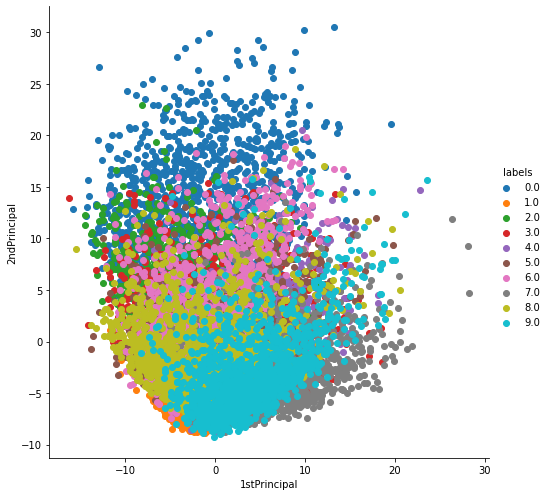

In [21]:
#appending the labels to pcaData
pcaData = np.vstack((pcaData.T, labels)).T

#creating the data frame from the resultant pcaData, so that we can plot the data  
pcaDataFrame = pd.DataFrame(data=newCoordinates,columns=("1stPrincipal", "2ndPrincipal", "labels"))

#print(pcaDataFrame.head())

sns.FacetGrid(pcaDataFrame,hue="labels",size=7).map(plt.scatter, "1stPrincipal", "2ndPrincipal").add_legend()

plt.show()